数据介绍：杜鲁门大学Dean De Cock教授整理的爱荷华州埃姆斯市观察的2919处房产数据，有79个几乎可以概况这个房子的方方面面的变量。其中1460个数据为训练数据，包含79个变量和对应的房价，1459个数据为测试数据只有这79个变量而没有房价数据，本次Kaggle挑战需要提交对测试数据的预测。

采取的步骤如下

## 数据统计
* 形状
* 描述性统计
* 分布倾斜

## 数据交互
* 相关性
* 散点图


## 数据准备
* 分类特征编码
* 缺失值处理
* 倾斜特征转换


## 基本模型
* Linear Regression (Linear algo)
* Ridge Regression (Linear algo)
* LASSO Linear Regression (Linear algo)
* Elastic Net Regression (Linear algo)



## 集成模型
* Bagging 
* Random Forest
* Adaboost
* GBDT(Gradient Boosting Decision Tree)
* Xgboost



In [1]:
# 导入模块
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%matplotlib inline


In [2]:
# 导入数据
train_df = pd.read_csv('C:/TemperaryTestFolder/train.csv', index_col=0)
test_df = pd.read_csv('C:/TemperaryTestFolder/test.csv', index_col=0)

FileNotFoundError: File b'C:/TemperaryTestFolder/train.csv' does not exist

# 数据统计
* 形状

In [5]:
print(train_df.shape ,test_df.shape)

(1460, 80) (1459, 79)


数据的形状与训练数据测试数据的描述相符

* 描述性统计

In [6]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* 倾斜

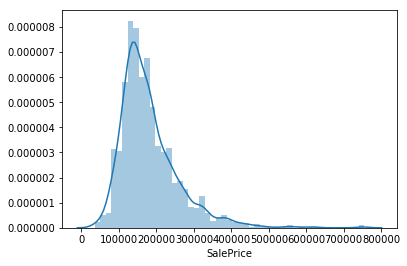

In [7]:
# 房价的分布
sns.distplot(train_df['SalePrice'])

In [8]:
train_df['SalePrice'].skew()

1.8828757597682129

房价的倾斜指数为1.88与分布图一致的反应了房价分布向右倾斜。

采用对数运算


In [ ]:
sns.distplot(np.log(train_df['SalePrice']))

In [10]:
# 查看一下所有数值特征的倾斜性
train_df.select_dtypes(include = ['float64', 'int64']).skew()

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

## 数据交互
* 相关性

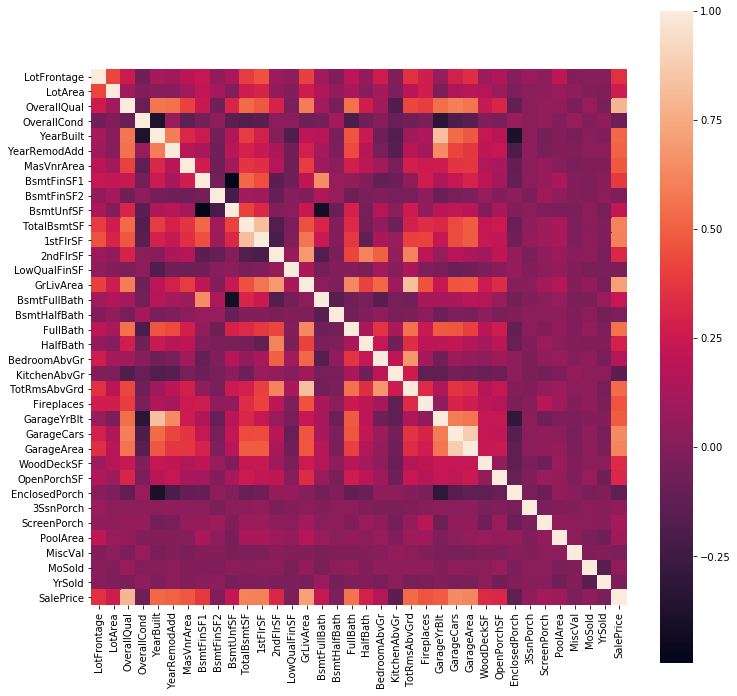

In [11]:
# 查看一下各个数值型特征间的相关性
corr = train_df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [12]:
# 个变量与房价的相关性
# 他们与房价之间的相关性
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
OverallCond: 	-0.0778558940486776
MoSold: 	0

房价和这些特征有比较大相关系数：OverallQual, GrLivArea(GarageCars), GargeArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GargeYrBlt, MasVnrArea , Fireplaces 但是它们两两之间有较大的相关性

* 散点图

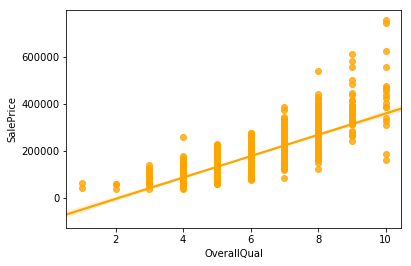

In [13]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = train_df, color = 'Orange')

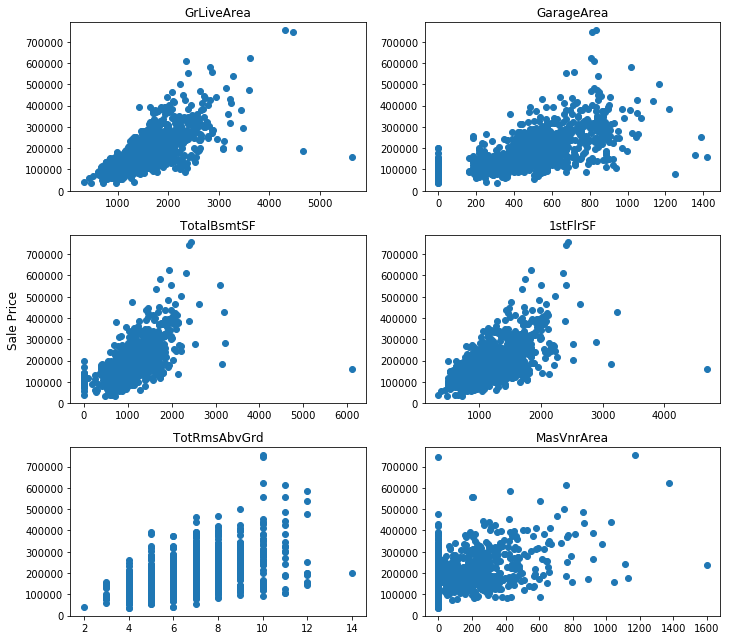

In [14]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = train_df.SalePrice.values
axarr[0, 0].scatter(train_df.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(train_df.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(train_df.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(train_df['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(train_df.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(train_df.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

## 数据准备
* 分类特征编码



In [15]:
#　将SalePrice并取对数提取为train_y, 合并训练数据和测试数据以便特征处理
y_train = np.log(train_df.pop('SalePrice'))
all_df = pd.concat((train_df, test_df), axis=0)

In [16]:
# pd.get_dummies()可将分类变量变成０和１方便后面的回归
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
all_dummy_df.shape

(2919, 288)

* 缺失值处理


In [18]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageArea        1
dtype: int64

用平均值代替缺失值

In [19]:
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

MSSubClass         57.137718
LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
dtype: float64

In [20]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

* 倾斜特征转换

In [21]:
# 对于所有的ｓｋｅｗ　大于０．７５的都取log(n+1)运算
numeric_feats = all_df.dtypes[all_df.dtypes != "object"].index
skewed_feats = all_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
all_dummy_df[skewed_feats] = np.log1p(all_dummy_df[skewed_feats])

In [22]:
# 重新分成训练数据和测试数据
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]
dummy_train_df.shape, dummy_test_df.shape

((1460, 288), (1459, 288))

## 基本模型

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
X_train = dummy_train_df.values
X_test = dummy_test_df.values

* 线性回归

In [24]:
clf = LinearRegression()
# Sklearn 计算模型的负均方误差，所以我们需要先取负再开根号得到我们的参数均方根误差
# cv = 5 会将数据分成大小相似的10份，轮流用9份用来训练，１份用来评估计算得分，会得到10个得分
test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print(test_score)

[0.1246848  0.10855647 0.11923838 0.16309823 0.14571851 0.45870003
 0.12627007 0.09833939 0.20138973 0.16073959]


In [25]:
np.mean(test_score)

0.17067352058439958

* Ridge Regression

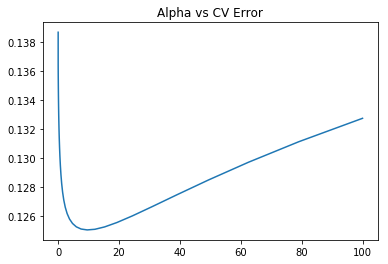

In [ ]:
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

采用岭回归的方法在α在10附近时回归模型表现最好，均方根误差约为0.125

* Lasso Regression

In [ ]:
alphas = np.logspace(-4, -3, 50)
test_scores = []
for alpha in alphas:
    clf = Lasso(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(alphas, test_scores) 
plt.title("Alpha vs CV Error");

α取值在0.0004左右时，Ｌａｓｓｏ回归表现最佳，均方根误差约为０．１２１，比岭回归０．１２５稍好

* Elastic Net Regression

 弹性网回归结合了岭回归和Lasso回归的优点，即在目标函数中对系数的约束既有L２范数，也有L１范数。
 前面的岭回归和lasso回归显示，Ｌ１参数为0.0004时得到最佳的lasso回归，Ｌ２参数为１０时有最佳的岭回归


In [ ]:
# 先尝试使用前面所得的最好的Ｌ１，Ｌ２参数
alpha = 10.0004
l1_ratio = 0.0004/alpha
clf = ElasticNet(alpha = alpha, l1_ratio=l1_ratio)
test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
np.mean(test_score)

In [ ]:
# 上面的方法行不通还是试试别的
from itertools import product
alphas = [0.0005, 0.001, 0.01, 0.03, 0.05, 0.1]
l1_ratios = [1.5, 1.1, 1, 0.9, 0.8, 0.7, 0.5]
cv_elastic = [np.sqrt(-cross_val_score(ElasticNet(alpha = alpha, l1_ratio=l1_ratio),
                                       X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())
             for (alpha, l1_ratio) in product(alphas, l1_ratios)]


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

idx = list(product(alphas, l1_ratios))
p_cv_elastic = pd.Series(cv_elastic, index = idx)
p_cv_elastic.plot(title = "Alpha l1_ratio vs CV Error")
plt.xlabel("alpha - l1_ratio")


In [ ]:
# 放大前１０个参数对
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
idx = list(product(alphas, l1_ratios))[:10]
p_cv_elastic = pd.Series(cv_elastic[:10], index = idx)
p_cv_elastic.plot(title = "Alpha l1_ratio vs CV Error")
plt.xlabel("alpha - l1_ratio")

α为０．０００５，Ｌ１占０．８的比例时弹性网回归有最好的表现，均方根误差为０．１２３左右,综上ｌａｓｓｏ回归α为0.0004时具有最好的表现


## 集成模型

* Bagging 

对上述最好的lasso回归，弹性网回归，岭回归用装袋回归进行提高，看看效果如何


Text(0.5, 1.0, 'Params vs CV Error')

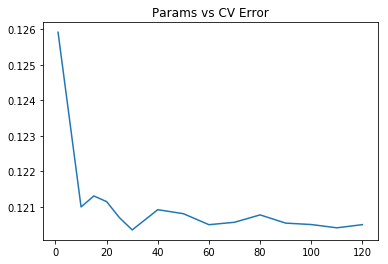

In [83]:
bestclf1 = Lasso(0.0004)
from sklearn.ensemble import BaggingRegressor
#bagged = BaggingRegressor(base_estimator=bestclf1, n_estimators=100)
#np.sqrt(-cross_val_score(bagged, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

params = [1, 10, 15, 20, 25, 30, 40, 50,60,70,80,90,100, 110,120]
test_scores = list()
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=bestclf1)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(params, test_scores)
plt.title("Params vs CV Error")


Text(0.5, 1.0, 'Params vs CV Error')

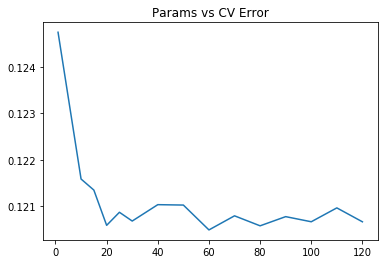

In [85]:
bestclf2 = ElasticNet(alpha = 0.0005, l1_ratio=0.8)
from sklearn.ensemble import BaggingRegressor
#bagged_2 = BaggingRegressor(base_estimator=bestclf2, n_estimators=100)
#np.sqrt(-cross_val_score(bagged_2, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

params = [1, 10, 15, 20, 25, 30, 40, 50,60,70,80,90,100, 110,120]
test_scores = list()
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=bestclf2)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(params, test_scores)
plt.title("Params vs CV Error")


Text(0.5, 1.0, 'Params vs CV Error')

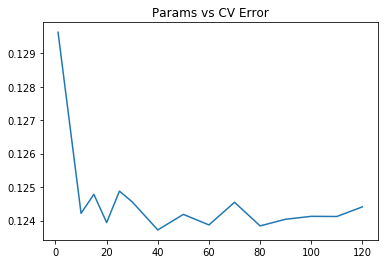

In [82]:
bestclf3 = Ridge(10)
from sklearn.ensemble import BaggingRegressor
bagged_3 = BaggingRegressor(base_estimator=bestclf3, n_estimators=100)
np.sqrt(-cross_val_score(bagged_3, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()


params = [1, 10, 15, 20, 25, 30, 40, 50,60,70,80,90,100, 110,120]
test_scores = list()
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=bestclf3)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(params, test_scores)
plt.title("Params vs CV Error")

#图片显示Bagging的效果还是不错的，在包含25个基分类器的时候错误率约为0.1135。

* 随机森林

Text(0.5, 1.0, 'Max Features vs CV Error')

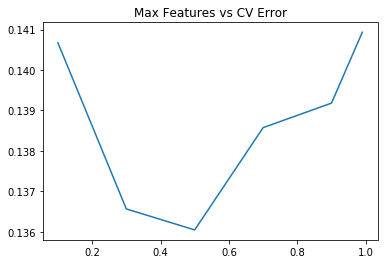

In [86]:
from sklearn.ensemble import RandomForestRegressor
#np.sqrt(-cross_val_score(RandomForestRegressor(), X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()


max_features = [.1, .3, .5, .7, .9, .99]
test_scores = list()
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=100, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error")
#当max_feature为0.5时，随机森林的错误最小，大概在0.136左右。

* Adaboost

In [34]:
from sklearn.ensemble import AdaBoostRegressor
np.sqrt(-cross_val_score(AdaBoostRegressor(base_estimator=bestclf1, n_estimators=100), X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.17200333156751768

In [35]:
np.sqrt(-cross_val_score(AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100), X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.21991147828752439

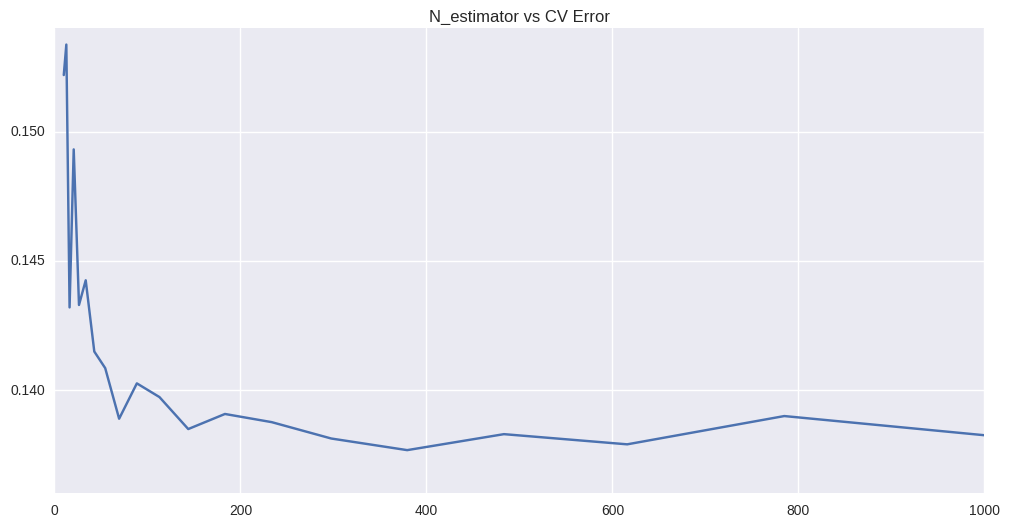

In [49]:
from sklearn.tree import DecisionTreeRegressor 
ns = np.logspace(1, 3, 20)
test_scores = []
for n in ns:
    n = int(n)
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=n), X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(ns, test_scores)
plt.title("N_estimator vs CV Error");

In [50]:
from sklearn.tree import DecisionTreeRegressor 

np.sqrt(-cross_val_score(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=380), X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.13734478463333208

* GBDT

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
np.sqrt(-cross_val_score(GradientBoostingRegressor(**params), X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.1299609610046929

* XGboost

In [ ]:
import xgboost as xgb

clf= xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)
np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

# 预测

In [53]:
bagged.fit(X_train,y_train)
bagged_2.fit(X_train,y_train)
clf.fit(X_train,y_train)
preds = (7.0*np.exp(clf.predict(X_test))+1.5*np.exp(bagged.predict(X_test)) + 1.5*np.exp(bagged_2.predict(X_test)))/10

In [54]:
pred_df = pd.DataFrame(preds, index=test_df.index, columns=["SalePrice"])
pred_df.to_csv('output.csv', header=True, index_label='Id')

In [ ]:
#最后，以alpha=15的岭回归模型作为基分类器，训练包括25个基分类器的Bagging模型。

from pandas import Series
from sklearn.ensemble import BaggingRegressor

bg = BaggingRegressor(n_estimators=25,base_estimator=Ridge(15))
bg.fit(X_train, y_train)
y_final = np.expm1(bg.predict(X_test))

submission_df = DataFrame(data={"Id":test_df.index, 'SalePrice':y_final})

submission_df.head()

submission_df.to_csv('C:/TemperaryTestFolder/output.csv',index=False)

#均方根误差（RMSE）为0.12133